In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation/Train.csv
/kaggle/input/customer-segmentation/Test.csv


In [2]:
TrainData=pd.read_csv('/kaggle/input/customer-segmentation/Train.csv')
TestData=pd.read_csv("/kaggle/input/customer-segmentation/Test.csv")

In [3]:
TrainData.head(7)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [4]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
pd.isnull(TrainData).sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
import plotly.express as px
px.pie(TestData, names='Segmentation', title='Percentage of each segment')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



<Axes: xlabel='Segmentation', ylabel='count'>

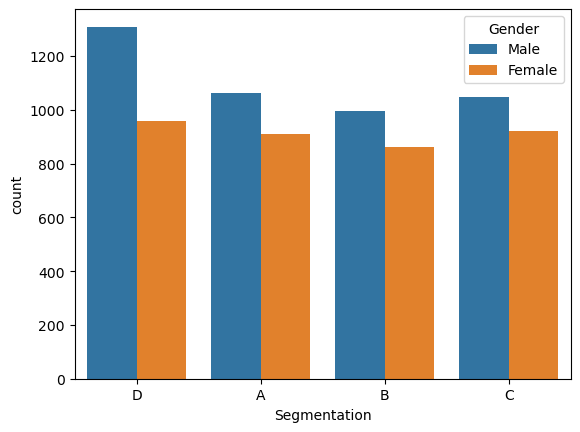

In [7]:
import seaborn as sns
sns.countplot(TrainData,x='Segmentation',hue='Gender')

<Axes: xlabel='Segmentation', ylabel='count'>

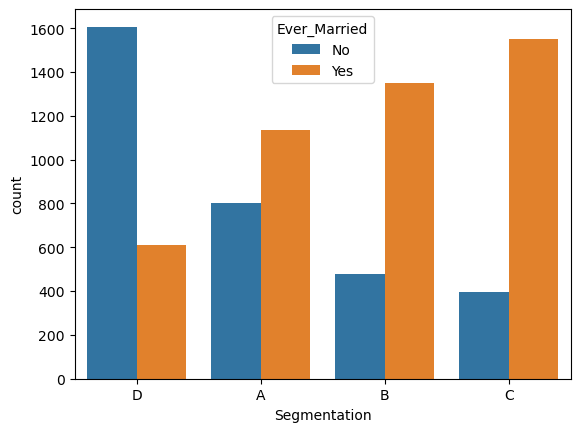

In [8]:
sns.countplot(TrainData,x='Segmentation',hue='Ever_Married')

In [9]:
# sns.histplot(data=TrainData, x='Age',hue='Segmentation')
import plotly.express as px
px.histogram(TrainData,x='Age',color='Segmentation')

<Axes: xlabel='Segmentation', ylabel='count'>

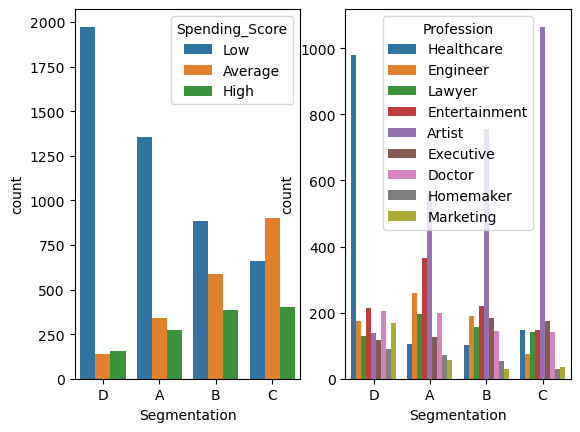

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
sns.countplot(TrainData,x='Segmentation',hue='Spending_Score',ax=ax[0])
sns.countplot(TrainData,x='Segmentation',hue='Profession', ax=ax[1])

In [11]:
px.histogram(TrainData,x='Work_Experience',color='Segmentation')

<Axes: xlabel='Segmentation', ylabel='count'>

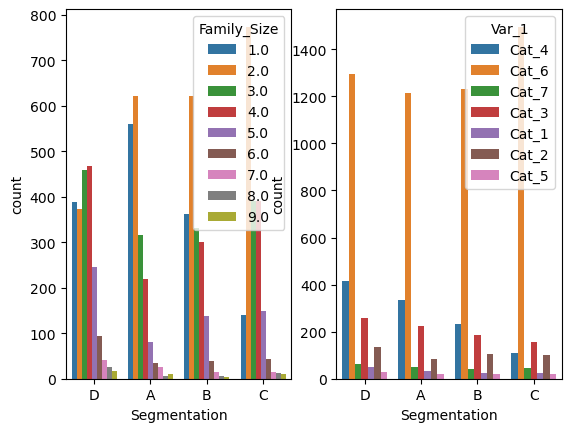

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
sns.countplot(TrainData,x='Segmentation',hue='Family_Size',ax=ax[0])
sns.countplot(TrainData,x='Segmentation',hue='Var_1', ax=ax[1])

<Axes: >

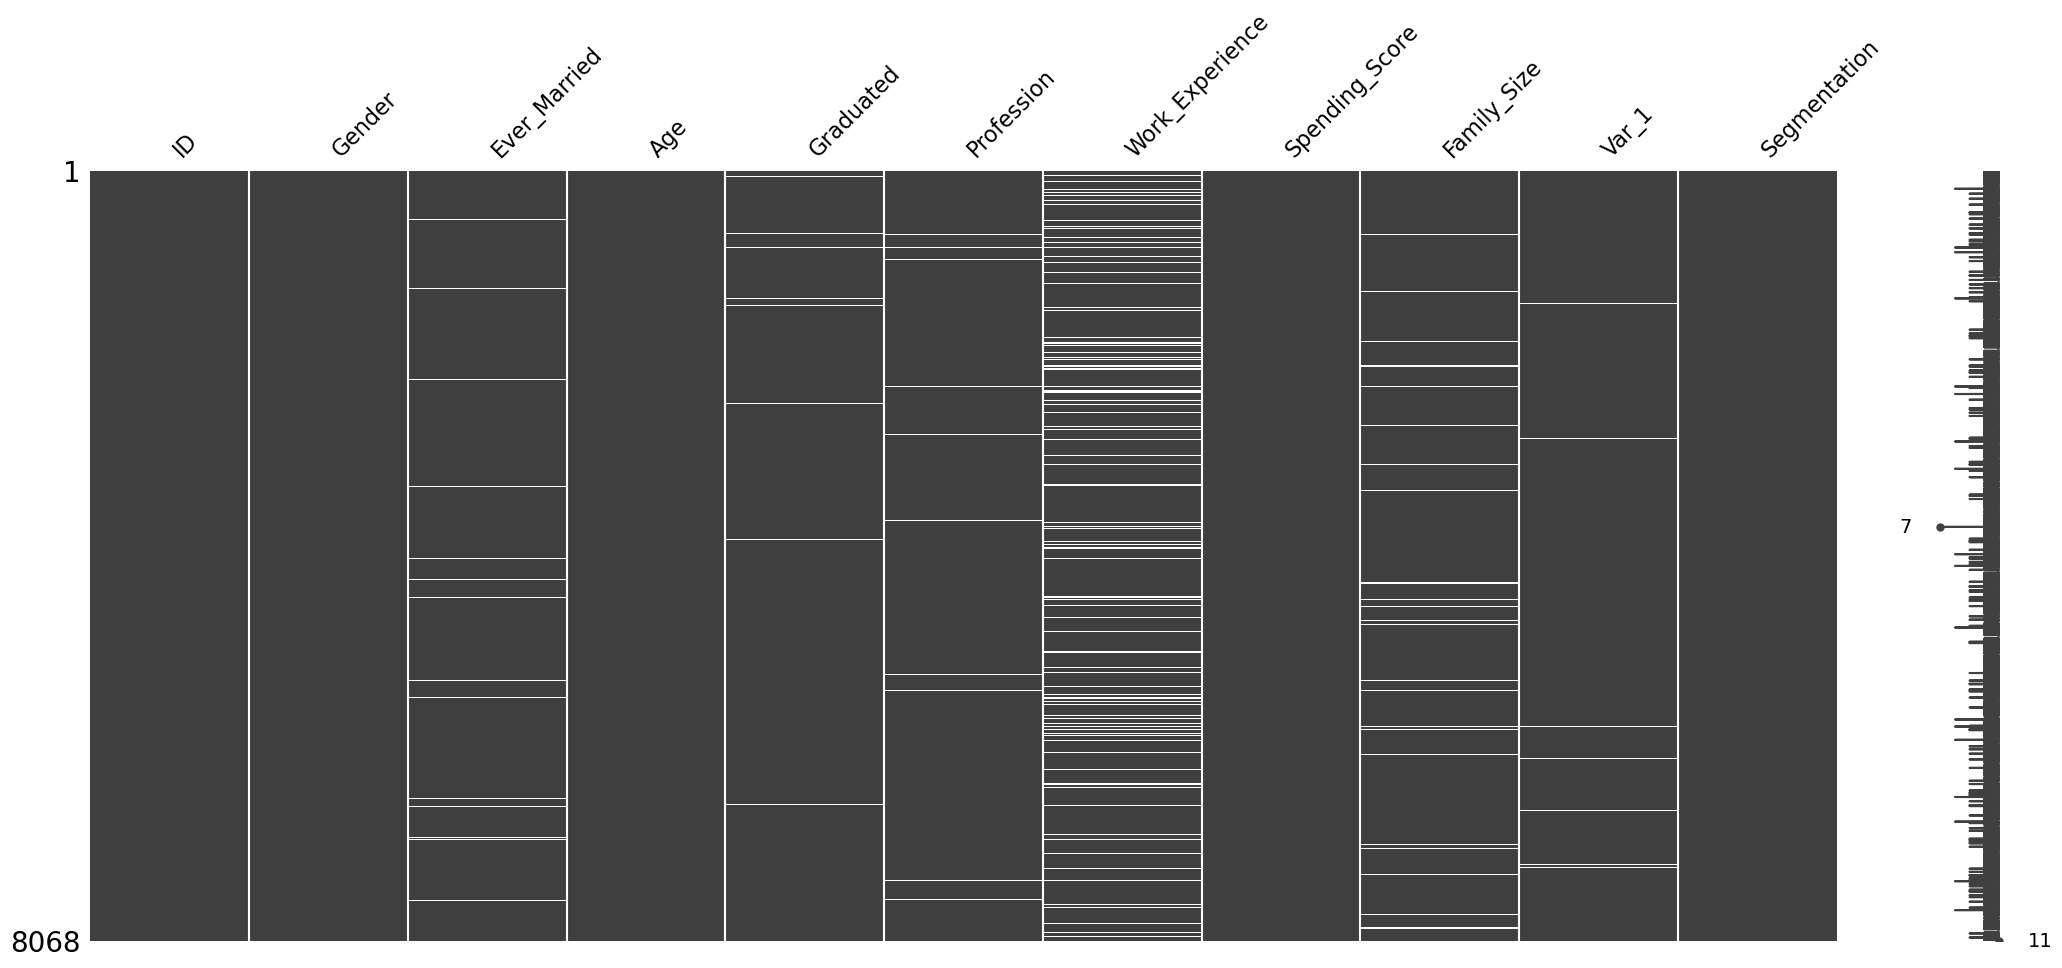

In [13]:
import missingno as msno
%matplotlib inline
msno.matrix(TrainData)

# **Analysis result:**
**Segmentation D:**
Usually non-married individuals under the age of 35 with a low spending score, primarily working in the healthcare sector.

**Segmentation A:**
Approximately 55% marriage rate with ages ranging from 25 to 53 years, and a low spending score.
Occupations include marketing, entertainment, engineering, and others.
Dominant family sizes are 1 and 2 persons.

**Segmentation B:**
About 75% marriage rate, typically falling within the 33 to 55 age range.
Mixed spending score distribution (low:average:high ratio of 4:3:2).
Commonly employed in the marketing sector.
Families in this segment generally consist of 2 members.

**Segmentation C:**
Roughly 80% marriage rate, with ages ranging from 32 to 70 years old.
Spending score varies across the segment (low:average:high ratio of 3:4:2).
Mainly working in the marketing field.
Family sizes in this segment typically range from 2 to 4 members.